# <center>Performance Comparison of Machine Learning Algorithms in Healthcare Diseases Conditions<br><br>(Data Size 1250 rows Implementation)<center>

### <center>Chan Soraneat Chanthan<br>001194686<br>Supervisor: Dr. Ik Soo Lim<center>

### Below represent two main parts:
1. Data Preperation
2. Diabetes Disease Condition

# 1. Data Preperation

## Loading Dataset

In [1]:
# Import all the needed packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Package needed
from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
from sklearn.model_selection import LeaveOneOut, KFold, cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# Read the csv file dataset and set as DT 
DT = pd.read_csv("BRFSS2020(21features).csv")
# Display the first 5 rows of the dataset
DT.head(5)

Diabetes  Kidney  HeartDisease  Asthma  Stroke  HeartAttack  SkinCancer  \
0       1.0     0.0           0.0     1.0     0.0          0.0         1.0   
1       0.0     0.0           0.0     0.0     0.0          0.0         0.0   
2       1.0     0.0           0.0     1.0     0.0          0.0         0.0   
3       0.0     0.0           0.0     0.0     0.0          0.0         1.0   
4       0.0     0.0           0.0     0.0     0.0          0.0         0.0   

    BMI  Smoke  PhysActivity  ...  HlthCov  NoMedCost  GenHlth  MentHlth  \
0  17.0    1.0           1.0  ...      0.0        1.0      2.0      30.0   
1   NaN    0.0           1.0  ...      1.0        0.0      3.0       0.0   
2  27.0    1.0           1.0  ...      1.0        0.0      4.0      30.0   
3  24.0    0.0           0.0  ...      1.0        0.0      3.0       0.0   
4  24.0    0.0           1.0  ...      1.0        0.0      2.0       0.0   

   PhysHlth  DiffWalk  Sex   Age  Age.1  Income  
0       3.0       0.0  0.0   8.0    6.0     1.0  
1       0.0       0.0  0.0  10.0    5.0     7.0  
2      20.0       0.0  1.0  10.0    4.0     5.0  
3       0.0       0.0  0.0  12.0    4.0     6.0  
4      28.0       1.0  0.0   5.0    6.0     6.0  

[5 rows x 21 columns]

In [3]:
# Display the shape of the entire dataset
DT.shape

(288306, 21)

## Data Analysis

In [4]:
# Check the basic information of the dataset
DT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288306 entries, 0 to 288305
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Diabetes           288306 non-null  float64
 1   Kidney             288306 non-null  float64
 2   HeartDisease       288306 non-null  float64
 3   Asthma             288306 non-null  float64
 4   Stroke             288306 non-null  float64
 5   HeartAttack        287736 non-null  float64
 6   SkinCancer         288306 non-null  float64
 7   BMI                274668 non-null  float64
 8   Smoke              288302 non-null  float64
 9   PhysActivity       288306 non-null  float64
 10  HvyAlcoholConsump  288306 non-null  float64
 11  HlthCov            288306 non-null  float64
 12  NoMedCost          288306 non-null  float64
 13  GenHlth            288304 non-null  float64
 14  MentHlth           288306 non-null  float64
 15  PhysHlth           288304 non-null  float64
 16  Di

In [5]:
# Check for the data structure
DT.describe()

Diabetes         Kidney   HeartDisease         Asthma  \
count  288306.000000  288306.000000  288306.000000  288306.000000   
mean        0.127441       0.036780       0.055941       0.135817   
std         0.333467       0.188222       0.229807       0.342595   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

              Stroke    HeartAttack     SkinCancer            BMI  \
count  288306.000000  287736.000000  288306.000000  274668.000000   
mean        0.036416       0.081543       0.090227      28.459082   
std         0.187324       0.273668       0.286507       6.374479   
min         0.000000       0.000000       0.000000      12.000000   
25%         0.000000       0.000000       0.000000      24.000000   
50%         0.000000       0.000000       0.000000      27.000000   
75%         0.000000       0.000000       0.000000      32.000000   
max         1.000000       1.000000       1.000000      95.000000   

               Smoke   PhysActivity  ...        HlthCov      NoMedCost  \
count  288302.000000  288306.000000  ...  288306.000000  288306.000000   
mean        0.415481       0.776935  ...       0.920827       0.085153   
std         0.492806       0.416302  ...       0.270009       0.279109   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.000000       1.000000  ...       1.000000       0.000000   
50%         0.000000       1.000000  ...       1.000000       0.000000   
75%         1.000000       1.000000  ...       1.000000       0.000000   
max         1.000000       1.000000  ...       1.000000       1.000000   

             GenHlth       MentHlth       PhysHlth       DiffWalk  \
count  288304.000000  288306.000000  288304.000000  288303.000000   
mean        2.401198       3.965266       3.370959       0.136766   
std         1.039708       7.987639       7.934076       0.343601   
min         1.000000       0.000000       0.000000       0.000000   
25%         2.000000       0.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%         3.000000       3.000000       2.000000       0.000000   
max         5.000000      30.000000      30.000000       1.000000   

                 Sex            Age          Age.1         Income  
count  288306.000000  288306.000000  288306.000000  288302.000000  
mean        0.468395       7.404518       5.033895       6.130495  
std         0.499001       3.476617       0.987887       2.055564  
min         0.000000       1.000000       1.000000       1.000000  
25%         0.000000       5.000000       4.000000       5.000000  
50%         0.000000       8.000000       5.000000       7.000000  
75%         1.000000      10.000000       6.000000       8.000000  
max         1.000000      13.000000       6.000000       8.000000  

[8 rows x 21 columns]

In [6]:
# Check for the profile information of data
profile = ProfileReport(DT)
profile

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Cleaning

In [7]:
#Check if the data has any duplcate values
DPC = DT[DT.duplicated()]
DPC

Diabetes  Kidney  HeartDisease  Asthma  Stroke  HeartAttack  \
560          0.0     0.0           0.0     0.0     0.0          0.0   
1166         0.0     0.0           0.0     0.0     0.0          0.0   
1217         0.0     0.0           0.0     0.0     0.0          0.0   
1920         0.0     0.0           0.0     0.0     0.0          0.0   
1923         0.0     0.0           0.0     0.0     0.0          0.0   
...          ...     ...           ...     ...     ...          ...   
288262       0.0     0.0           0.0     0.0     0.0          0.0   
288268       0.0     0.0           0.0     0.0     0.0          0.0   
288285       0.0     0.0           0.0     0.0     0.0          0.0   
288301       0.0     0.0           0.0     0.0     0.0          0.0   
288302       0.0     0.0           0.0     0.0     0.0          0.0   

        SkinCancer   BMI  Smoke  PhysActivity  ...  HlthCov  NoMedCost  \
560            0.0  30.0    0.0           1.0  ...      1.0        0.0   
1166           0.0  26.0    1.0           1.0  ...      1.0        0.0   
1217           0.0  26.0    1.0           1.0  ...      1.0        0.0   
1920           0.0  27.0    0.0           1.0  ...      1.0        0.0   
1923           0.0  31.0    0.0           1.0  ...      1.0        0.0   
...            ...   ...    ...           ...  ...      ...        ...   
288262         0.0  23.0    0.0           1.0  ...      1.0        0.0   
288268         0.0  24.0    0.0           1.0  ...      1.0        0.0   
288285         0.0  33.0    0.0           1.0  ...      1.0        0.0   
288301         0.0  23.0    0.0           1.0  ...      1.0        0.0   
288302         0.0  22.0    0.0           1.0  ...      1.0        0.0   

        GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Age.1  Income  
560         1.0       0.0       0.0       0.0  1.0   8.0    6.0     8.0  
1166        2.0       0.0       0.0       0.0  0.0   8.0    4.0     8.0  
1217        2.0       0.0       0.0       0.0  1.0   9.0    6.0     8.0  
1920        3.0       0.0       0.0       0.0  0.0   9.0    4.0     6.0  
1923        3.0       0.0       0.0       0.0  1.0   8.0    6.0     8.0  
...         ...       ...       ...       ...  ...   ...    ...     ...  
288262      1.0       0.0       0.0       0.0  1.0   6.0    6.0     5.0  
288268      3.0       0.0       0.0       0.0  0.0  11.0    5.0     3.0  
288285      2.0       0.0       0.0       0.0  1.0   6.0    6.0     8.0  
288301      1.0       0.0       0.0       0.0  0.0   9.0    6.0     7.0  
288302      1.0       0.0       0.0       0.0  0.0   1.0    5.0     2.0  

[50915 rows x 21 columns]

In [8]:
# Drop the duplcate values from dataframe
DT = DT.drop_duplicates()
# Display the shape of data after drop duplicate values
DT.shape

(237391, 21)

In [9]:
#Check if the data has any null values (Missing value) in each column
DT.isnull().sum()

Diabetes                 0
Kidney                   0
HeartDisease             0
Asthma                   0
Stroke                   0
HeartAttack            570
SkinCancer               0
BMI                  11300
Smoke                    4
PhysActivity             0
HvyAlcoholConsump        0
HlthCov                  0
NoMedCost                0
GenHlth                  2
MentHlth                 0
PhysHlth                 2
DiffWalk                 3
Sex                      0
Age                      0
Age.1                    0
Income                   4
dtype: int64

In [10]:
# Drop the missing values from dataframe
DT = DT.dropna()
# Display the shape of data after drop missing values
DT.shape

(225545, 21)

## Data Clustering

In [11]:
# Use K-mean clustering model to group by the similar data point into 1250 clusters
KM = KMeans(n_clusters=1250, random_state=0)
KM.fit(DT)

KMeans(n_clusters=1250, random_state=0)

In [12]:
# Input the K-mean label as a new feature in the dataframe
DT["Label1250"] = KM.labels_

In [13]:
# Save the upgrade the dataframe as a new csv file
DT.to_csv('1250cluster_BRFSS2020(21features).csv', sep=",", index=False)

In [14]:
# Read the file of upgraded dataframe and set as DTT
DTT = pd.read_csv("1250cluster_BRFSS2020(21features).csv")

In [15]:
# Display the first 5 rows of the dataset
DTT.head(5)

Diabetes  Kidney  HeartDisease  Asthma  Stroke  HeartAttack  SkinCancer  \
0       1.0     0.0           0.0     1.0     0.0          0.0         1.0   
1       1.0     0.0           0.0     1.0     0.0          0.0         0.0   
2       0.0     0.0           0.0     0.0     0.0          0.0         1.0   
3       0.0     0.0           0.0     0.0     0.0          0.0         0.0   
4       0.0     0.0           0.0     1.0     0.0          0.0         1.0   

    BMI  Smoke  PhysActivity  ...  NoMedCost  GenHlth  MentHlth  PhysHlth  \
0  17.0    1.0           1.0  ...        1.0      2.0      30.0       3.0   
1  27.0    1.0           1.0  ...        0.0      4.0      30.0      20.0   
2  24.0    0.0           0.0  ...        0.0      3.0       0.0       0.0   
3  24.0    0.0           1.0  ...        0.0      2.0       0.0      28.0   
4  22.0    0.0           1.0  ...        0.0      4.0       0.0      15.0   

   DiffWalk  Sex   Age  Age.1  Income  Label1250  
0       0.0  0.0   8.0    6.0     1.0       1023  
1       0.0  1.0  10.0    4.0     5.0        443  
2       0.0  0.0  12.0    4.0     6.0        970  
3       1.0  0.0   5.0    6.0     6.0        933  
4       0.0  0.0  11.0    6.0     7.0        140  

[5 rows x 22 columns]

In [16]:
# Display the amount of datapoints in each label group
DTT.groupby(['Label1250']).size()

Label1250
0       392
1       158
2       108
3        54
4       309
       ... 
1245    255
1246     81
1247    279
1248     48
1249     86
Length: 1250, dtype: int64

In [17]:
# Take the a random datapoint from each representive group and set as NDT
NDT = pd.DataFrame()
for i in range(0,1250):
    df = DTT[DTT.Label1250 == i]
    DTTT = np.random.choice(df.index.values, 1)
    sampled_df = DTT.loc[DTTT]
    NDT = pd.concat([NDT, sampled_df], ignore_index = True, axis = 0)
# Display the first 10 rows of the dataset
NDT.head(10)

Diabetes  Kidney  HeartDisease  Asthma  Stroke  HeartAttack  SkinCancer  \
0       0.0     0.0           0.0     0.0     0.0          1.0         1.0   
1       0.0     0.0           0.0     0.0     0.0          0.0         0.0   
2       0.0     0.0           0.0     0.0     1.0          0.0         0.0   
3       0.0     1.0           1.0     1.0     1.0          1.0         0.0   
4       0.0     0.0           0.0     0.0     0.0          0.0         0.0   
5       0.0     0.0           0.0     0.0     0.0          0.0         0.0   
6       1.0     0.0           0.0     0.0     0.0          0.0         0.0   
7       0.0     0.0           1.0     0.0     0.0          1.0         0.0   
8       0.0     0.0           0.0     0.0     0.0          0.0         0.0   
9       0.0     0.0           0.0     0.0     0.0          0.0         0.0   

    BMI  Smoke  PhysActivity  ...  NoMedCost  GenHlth  MentHlth  PhysHlth  \
0  24.0    0.0           1.0  ...        0.0      3.0       0.0       0.0   
1  31.0    1.0           1.0  ...        0.0      2.0       7.0       0.0   
2  32.0    0.0           0.0  ...        0.0      5.0      15.0      30.0   
3  35.0    1.0           1.0  ...        0.0      5.0      29.0      10.0   
4  31.0    1.0           1.0  ...        1.0      2.0       2.0       0.0   
5  25.0    1.0           1.0  ...        0.0      2.0       0.0       0.0   
6  49.0    0.0           1.0  ...        0.0      4.0       5.0       5.0   
7  25.0    1.0           0.0  ...        0.0      4.0       0.0      30.0   
8  30.0    0.0           1.0  ...        0.0      3.0      15.0       5.0   
9  33.0    0.0           1.0  ...        0.0      2.0      28.0       0.0   

   DiffWalk  Sex   Age  Age.1  Income  Label1250  
0       0.0  0.0  13.0    5.0     8.0          0  
1       0.0  1.0   3.0    6.0     8.0          1  
2       1.0  0.0  13.0    4.0     4.0          2  
3       1.0  0.0   5.0    6.0     2.0          3  
4       0.0  0.0  12.0    5.0     6.0          4  
5       0.0  1.0   5.0    4.0     7.0          5  
6       0.0  0.0   3.0    5.0     4.0          6  
7       1.0  1.0  11.0    5.0     5.0          7  
8       0.0  1.0   4.0    6.0     8.0          8  
9       0.0  0.0   6.0    6.0     8.0          9  

[10 rows x 22 columns]

In [18]:
# Save the dataframe of representive data as a new csv file
NDT.to_csv('1250Representive_data.csv', sep=",", index=False)

In [19]:
# Read the file of representive data
NDT = pd.read_csv("1250Representive_data.csv")

In [20]:
# Drop the column of label while it doesn't need for the further execute
NDT.drop('Label1250', axis = 1)

Diabetes  Kidney  HeartDisease  Asthma  Stroke  HeartAttack  SkinCancer  \
0          0.0     0.0           0.0     0.0     0.0          1.0         1.0   
1          0.0     0.0           0.0     0.0     0.0          0.0         0.0   
2          0.0     0.0           0.0     0.0     1.0          0.0         0.0   
3          0.0     1.0           1.0     1.0     1.0          1.0         0.0   
4          0.0     0.0           0.0     0.0     0.0          0.0         0.0   
...        ...     ...           ...     ...     ...          ...         ...   
1245       0.0     0.0           0.0     0.0     0.0          0.0         0.0   
1246       0.0     0.0           0.0     0.0     0.0          0.0         0.0   
1247       0.0     0.0           0.0     0.0     0.0          0.0         0.0   
1248       0.0     0.0           0.0     0.0     0.0          0.0         0.0   
1249       0.0     0.0           0.0     0.0     0.0          0.0         0.0   

       BMI  Smoke  PhysActivity  ...  HlthCov  NoMedCost  GenHlth  MentHlth  \
0     24.0    0.0           1.0  ...      1.0        0.0      3.0       0.0   
1     31.0    1.0           1.0  ...      1.0        0.0      2.0       7.0   
2     32.0    0.0           0.0  ...      1.0        0.0      5.0      15.0   
3     35.0    1.0           1.0  ...      1.0        0.0      5.0      29.0   
4     31.0    1.0           1.0  ...      1.0        1.0      2.0       2.0   
...    ...    ...           ...  ...      ...        ...      ...       ...   
1245  26.0    0.0           1.0  ...      1.0        0.0      2.0      28.0   
1246  40.0    0.0           1.0  ...      1.0        0.0      4.0       0.0   
1247  38.0    0.0           0.0  ...      1.0        0.0      2.0       0.0   
1248  47.0    1.0           0.0  ...      1.0        0.0      3.0       0.0   
1249  43.0    1.0           0.0  ...      0.0        1.0      3.0       3.0   

      PhysHlth  DiffWalk  Sex   Age  Age.1  Income  
0          0.0       0.0  0.0  13.0    5.0     8.0  
1          0.0       0.0  1.0   3.0    6.0     8.0  
2         30.0       1.0  0.0  13.0    4.0     4.0  
3         10.0       1.0  0.0   5.0    6.0     2.0  
4          0.0       0.0  0.0  12.0    5.0     6.0  
...        ...       ...  ...   ...    ...     ...  
1245       0.0       0.0  1.0   8.0    6.0     8.0  
1246      30.0       0.0  0.0   7.0    4.0     5.0  
1247       0.0       0.0  0.0  12.0    5.0     7.0  
1248      14.0       0.0  0.0   5.0    2.0     1.0  
1249       0.0       0.0  0.0   9.0    6.0     4.0  

[1250 rows x 21 columns]

# 2. Diabetes Disease Condition

## Balanced Data

In [21]:
# Display distribution count in feature diabetes
# 0 is for no diabetes, 1 is for yes diabetes
NDT.groupby(['Diabetes']).size()

Diabetes
0.0    1008
1.0     242
dtype: int64

<AxesSubplot:title={'center':'Before Over-Sampling'}>

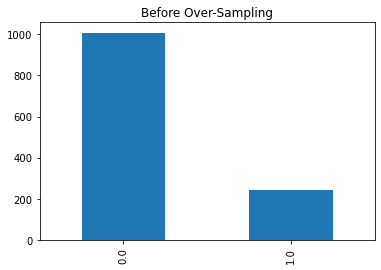

In [22]:
# Checking the balance of the feature diabetes
NDT['Diabetes'].value_counts().plot(kind = 'bar', title = 'Before Over-Sampling')

<AxesSubplot:title={'center':'After Over-Sampling'}>

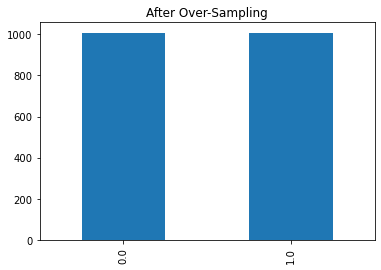

In [23]:
# Over-sampling of the dataset to get a balanced dataset
c0 = NDT[NDT['Diabetes'] == 0]
c1 = NDT[NDT['Diabetes'] == 1]

# Use random sample technique to over-sampling of the minority class 1
cc1 = c1.sample(len(c0), replace=True)

# Creating a new dataframe with over sampled
DTnew = pd.concat([cc1, c0], axis=0)

# Display the new label distribution of the feature diabetes after balanced the data
DTnew['Diabetes'].value_counts().plot(kind='bar', title='After Over-Sampling')

In [24]:
# Display the new data shape of the data
DTnew.shape

(2016, 22)

In [25]:
# Display distribution count in feature diabetes after over sampling
DTnew.groupby(['Diabetes']).size()

Diabetes
0.0    1008
1.0    1008
dtype: int64

In [26]:
# Declare features values and target value
X = DTnew.drop('Diabetes', axis = 1)
y = DTnew[['Diabetes']]

## Implementations of Classification Models

In [27]:
# Diabetes disease implementation
# Leave-one-out cross-validation
# Random Forest algorithm
cv = LeaveOneOut()
classifier1 = RandomForestClassifier()
y_predd1 = cross_val_predict(classifier1, X, y.values.ravel(), cv = cv)
print("Cross Validation are {}".format(y_predd1))

accuracy = accuracy_score(y, y_predd1)
precision = precision_score(y, y_predd1)
recall = recall_score(y, y_predd1)
f1 = f1_score(y, y_predd1) 
print('\nAccuracy = {0:.4f}, \nprecision = {1:.4f}, \nrecall = {2:.4f},\
\nF1 = {3:.4f}'.format(accuracy, precision, recall, f1))

Cross Validation are [1. 1. 1. ... 1. 0. 0.]

Accuracy = 0.9603, 
precision = 0.9369, 
recall = 0.9871,
F1 = 0.9614


In [28]:
# Diabetes disease implementation
# Leave-one-out cross-validation
# Decision Tree algorithm
cv = LeaveOneOut()
classifier2 = DecisionTreeClassifier()
y_predd2 = cross_val_predict(classifier2, X, y.values.ravel(), cv = cv)
print("Cross Validation are {}".format(y_predd2))

accuracy = accuracy_score(y, y_predd2)
precision = precision_score(y, y_predd2)
recall = recall_score(y, y_predd2)
f1 = f1_score(y, y_predd2) 
print('\nAccuracy = {0:.4f}, \nprecision = {1:.4f}, \nrecall = {2:.4f},\
\nF1 = {3:.4f}'.format(accuracy, precision, recall, f1))

Cross Validation are [1. 1. 1. ... 1. 1. 0.]

Accuracy = 0.9008, 
precision = 0.8424, 
recall = 0.9861,
F1 = 0.9086


In [29]:
# Diabetes disease implementation
# Leave-one-out cross-validation
# Logistic Regression algorithm
cv = LeaveOneOut()
classifier3 = LogisticRegression(solver='liblinear')
y_predd3 = cross_val_predict(classifier3, X, y.values.ravel(), cv = cv)
print("Cross Validation are {}".format(y_predd3))

accuracy = accuracy_score(y, y_predd3)
precision = precision_score(y, y_predd3)
recall = recall_score(y, y_predd3)
f1 = f1_score(y, y_predd3)
print('\nAccuracy = {0:.4f}, \nprecision = {1:.4f}, \nrecall = {2:.4f},\
\nF1 = {3:.4f}'.format(accuracy, precision, recall, f1))

Cross Validation are [1. 1. 1. ... 1. 1. 0.]

Accuracy = 0.7133, 
precision = 0.7059, 
recall = 0.7312,
F1 = 0.7183


In [30]:
# Diabetes disease implementation
# Leave-one-out cross-validation
# K-Nearest Neighbor algorithm
cv = LeaveOneOut()
classifier4 = KNeighborsClassifier()
y_predd4 = cross_val_predict(classifier4, X, y.values.ravel(), cv = cv)
print("Cross Validation are {}".format(y_predd4))

accuracy = accuracy_score(y, y_predd4)
precision = precision_score(y, y_predd4)
recall = recall_score(y, y_predd4)
f1 = f1_score(y, y_predd4)
print('\nAccuracy = {0:.4f}, \nprecision = {1:.4f}, \nrecall = {2:.4f},\
\nF1 = {3:.4f}'.format(accuracy, precision, recall, f1))

Cross Validation are [1. 1. 1. ... 0. 0. 0.]

Accuracy = 0.7639, 
precision = 0.7094, 
recall = 0.8938,
F1 = 0.7910


In [31]:
# Diabetes disease implementation
# Leave-one-out cross-validation
# Gradient Boosting algorithm
cv = LeaveOneOut()
classifier5 = GradientBoostingClassifier()
y_predd5 = cross_val_predict(classifier5, X, y.values.ravel(), cv = cv)
print("Cross Validation are {}".format(y_predd5))

accuracy = accuracy_score(y, y_predd5)
precision = precision_score(y, y_predd5)
recall = recall_score(y, y_predd5)
f1 = f1_score(y, y_predd5)
print('\nAccuracy = {0:.4f}, \nprecision = {1:.4f}, \nrecall = {2:.4f},\
\nF1 = {3:.4f}'.format(accuracy, precision, recall, f1))

Cross Validation are [1. 1. 1. ... 1. 0. 0.]

Accuracy = 0.8289, 
precision = 0.7895, 
recall = 0.8968,
F1 = 0.8398


In [32]:
# Diabetes disease implementation
# Leave-one-out cross-validation
# Gaussian Naive Bayes algorithm
cv = LeaveOneOut()
classifier6 = GaussianNB()
y_predd6 = cross_val_predict(classifier6, X, y.values.ravel(), cv = cv)
print("Cross Validation are {}".format(y_predd6))

accuracy = accuracy_score(y, y_predd6)
precision = precision_score(y, y_predd6)
recall = recall_score(y, y_predd6)
f1 = f1_score(y, y_predd6)
print('\nAccuracy = {0:.4f}, \nprecision = {1:.4f}, \nrecall = {2:.4f},\
\nF1 = {3:.4f}'.format(accuracy, precision, recall, f1))

Cross Validation are [1. 1. 1. ... 0. 1. 0.]

Accuracy = 0.6612, 
precision = 0.6905, 
recall = 0.5843,
F1 = 0.6330
